In [1]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Finding a Minimum of a Function
## We need to know something about the function
## Class Participation: I have an unknown unconstrained 1D problem below - what is the minimum?

In [8]:
from imt import mystery1D1o, mystery1D2o

# Conceptually two approaches to find out more of a function
## Approach 1: Taylor series expansion - what is this about?
## Goose bump idea: you know everything about a function at any point if you know lots of things of the function at ONLY ONE point:
## $$ f(\mathbf{x}_0 + \mathbf{\Delta x}) = \frac{1}{0!} f(\mathbf{x}_0) + \frac{1}{1!}\nabla \mathbf{f}(\mathbf{x}_0)ˆT \mathbf{\Delta x} + \frac{1}{2!} \mathbf{\Delta x}ˆT \mathbf{H} \mathbf{\Delta x} + \dots
$$
## Reminder: Check out the Taylor series approximation for a 1D function below:

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def TaylorApproximate(SelectedPoint,Terms):
    XEval = np.linspace(-1,1,101)
    x = sp.symbols('x')
    Dx = sp.symbols('Dx')
    MyUnknownFunction = x**2 + sp.cos(x**2) - sp.sin((2*x)**4)
    MyTaylorApproximation = MyUnknownFunction.subs({x:SelectedPoint})
    
    term = 1; Condition = True
    GradientTerm = MyUnknownFunction
    while term <= Terms:
        GradientTerm = sp.derive_by_array(GradientTerm,x)
        GradientTermEvaluated = GradientTerm.subs({x:SelectedPoint})
        MyTaylorApproximation = MyTaylorApproximation + 1/np.math.factorial(term)*GradientTermEvaluated*(Dx-SelectedPoint)**term

        term = term + 1
             
    MyTaylorApproximationEvaluate = [sp.lambdify((Dx),MyTaylorApproximation)(point) for point in XEval]
    MyUnknownFunctionEvaluated = [sp.lambdify((x),MyUnknownFunction)(point) for point in XEval]
    plt.figure(1);plt.plot(XEval,MyTaylorApproximationEvaluate,'g--');plt.axis([-1,1,-1,3])
    plt.plot(XEval,MyUnknownFunctionEvaluated,'r:');plt.title(str(term))
    plt.show()

interactive_plot = interactive(TaylorApproximate,SelectedPoint=(-1.0,1.0),Terms=(0,100))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



A Jupyter Widget

## Approach 2: Design of experiments + surrogates - what is this about?
## Obvious idea: you can know everything about a function at any point if you know limited things of the function at EVERY POINT.
## Reminder: Check out the piece-wise linear approximator for a 1D function below:

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def DOEApproximate(NumberPoints):
    XEval = np.linspace(-1,1,101)
    x = XEval
    MyUnknownFunctionEval = x**2 + np.cos(x**2) - np.sin((2*x)**4)

    
    x = np.sort(np.random.random(NumberPoints)*2.0-1.0)
    MyUnknownFunction = x**2 + np.cos(x**2) - np.sin((2*x)**4)
    
    plt.figure(1);
    plt.plot(XEval,MyUnknownFunctionEval,'g-');plt.axis([-1,1,-1,3])
    plt.plot(x,MyUnknownFunction,'ro--');plt.title(str(NumberPoints))
    plt.show()

interactive_plot = interactive(DOEApproximate,NumberPoints=(1,100))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

--------------------------------------------------------------------------------------------

# This should be easy right? Now we know the function.
## What are the potential issues with the Taylor series expansion approach?

Write your ideas down

--------------------------------------------------------------------------------------------

## What are the potential issues with the Surrogate approach?

Write your ideas down

--------------------------------------------------------------------------------------------

# From Low to High Dimensional Problems
## Let us consider the design vector $\mathbf{x} \in \mathcal{R}ˆn$ as $n\rightarrow \infty$
## What are the implications as $n\rightarrow\infty$
## Activity: Hyper rectangle is defined by the vertices that define the domain e.g. a line has two vertices the beginning and end of a line and a rectangle has four vertices. Plot the number of vertices of the hyper rectangle as a function of dimensionality $n$.

In [34]:
print('Plot here')

Plot here


## New found respect for the difficulty in solving an optimization problem. 
## Curse of dimensionality
## How does the curse of dimensionality affect the Taylor series expansion?

Write your ideas here

## How does the curse of dimensionality affect the Surrogate approach?

Write your ideas here

-------------------------------------------------------------------------------

## Class Participation: I have an unknown unconstrained 2D problem below - where is the minimum of this function?

In [7]:
from imt import mystery2D1o, mystery2D2o, mystery2D3o

## Does the Taylor series expansion help us?
## $$ f(\mathbf{x}_0 + \mathbf{\Delta x}) = \frac{1}{0!} f(\mathbf{x}_0) + \frac{1}{1!}\nabla\mathbf{f}(\mathbf{x}_0)ˆT 
\mathbf{\Delta x} + \frac{1}{2!} \mathbf{\Delta x}ˆT \mathbf{H}(\mathbf{x}_0) \mathbf{\Delta x} + \dots $$
## If we start at $(\mathbf{x}_0)$ what information can the following terms contribute:
## $f(\mathbf{x}_0)$
## $\nabla \mathbf{f}(\mathbf{x}_0)$
## $\mathbf{H}(\mathbf{x}_0)$

Write your ideas here!

# Investigation: Easiest 2D problem
# Recap of the gradient vector:
# Investigation: What information is in the gradient vector?
# Tool: Use the tool below to investigate
## 1. In what direction does the gradient vector point?
## 2. Is there a relationship between the gradient vector and contour of the function?
## 3. How does the magntidue of the gradient vector change?
## 4. How does the direction of the gradient vector change?
## 5. How can you use the gradient vector to help you optimize?

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2
    GRADIENT_AT_POINT = [2*(PointX-0.5), 2*(PointY+0.2)]
    plt.figure(1);
    plt.contour(X,Y,F,101);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.title('Gradient vector');plt.axis('equal')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Revisit the Hessian matrix:
# Investigation: What information is in the Hessian matrix?
# Tool: Use the tool below to investigate
# White arrow is the first row of Hessian matrix
# Green arrow is the second row of Hessian matrix
# Yellow arrow is the sum of the previous two vectors
## 1. Does the white and green arrows change length?
## 2. Does the white and green arrows change direction?
## 3. Based on 1. and 2. what do you know for a fact about the order of the function?
## 4. Can the Hessian matrix help you to optimize? Do we need to worry about the Hessian matrix at all?

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2
    GRADIENT_AT_POINT = np.array([2*(PointX-0.5), 2*(PointY+0.2)])
    HESSIAN_AT_POINT = np.array([[2,0],[0,2]])
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[0][0]),0.1*(HESSIAN_AT_POINT[0][1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[1][0]),0.1*(HESSIAN_AT_POINT[1][1]),color=(0.0, 1.0, 0.5, 1.0),linewidth=3,head_width=0.1)     
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[0][0]+HESSIAN_AT_POINT[1][0]),0.1*(HESSIAN_AT_POINT[0][1]+HESSIAN_AT_POINT[1][1]),color=(1.0, 1.0, 0.0, 1.0),linewidth=3,head_width=0.1)     
    plt.title('Green Hessian Y White Hessian X')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Recap of what we have learned
## The idea of an interior point algorithm is born.
## The simplest algorithm ever - Algorithm 1: At any point $\mathbf{x}$ compute the gradient vector $\nabla f(\mathbf{x})$, move in the opposite direction with a fixed step size and update $\mathbf{x}$ - repeat until you 'converge' - this is gradient descent algorithm (Machine Learning) or subgradient method (Convex Progamming).
## Two things to observe w.r.t. specific problem above, if you move along the gradient direction, the direction does not change. You usually have to wait twice as long to compute the gradient than a function value, we could improve!
## Algorithm 2: At any point $\mathbf{x}$ compute the gradient vector $\nabla f(\mathbf{x})$, move in the opposite direction until you have found a minimum - this is the steepest descent algorithm.
## **The idea of a line search is born:** $$
\min_{\arg \alpha} F(\alpha) = f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$$

------

# Investigation: Slighty more difficult 2D
## Recap of the gradient vector:
## Investigation: What information is in the gradient vector?
## Tool: Use the tool below to investigate
## 1. Is the gradient vector still as efficient to help you to optimize compared to the previous problem?

In [33]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2 + 1.0*(X-0.5)*(Y+0.2)
    GRADIENT_AT_POINT = [2*(PointX-0.5) + 1.0*(PointY+0.2), 2*(PointY+0.2) + 1.0*(PointX-0.5)]
    plt.figure(1);
    plt.contour(X,Y,F,101);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.title('Gradient vector');plt.axis('equal')
    plt.plot(0.5,-0.2,'bo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Revisit the Hessian matrix:
# Investigation: What information is in the Hessian matrix?
# Tool: Use the tool below to investigate
# White arrow is the first row of Hessian matrix
# Green arrow is the second row of Hessian matrix
## 1. Can the Hessian matrix help us to optimize? Do we need to worry about the Hessian matrix at all?
## 2. Can the Hessian matrix allow us to optimize the problem with one guess?
### $$ f(\mathbf{x}_0 + \mathbf{\Delta x}) = \frac{1}{0!} f(\mathbf{x}_0) + \frac{1}{1!}\nabla\mathbf{f}(\mathbf{x}_0)ˆT 
\mathbf{\Delta x} + \frac{1}{2!} \mathbf{\Delta x}ˆT \mathbf{H}(\mathbf{x}_0) \mathbf{\Delta x}$$
## Compute the gradient vector of the Taylor series approximation w.r.t. $\mathbf{\Delta x}$
## $$ \nabla f(\mathbf{x}_0 + \mathbf{\Delta x}) = \nabla\mathbf{f}(\mathbf{x}_0) + \mathbf{H}(\mathbf{x}_0) \mathbf{\Delta x}$$ - how does this help us?
## Compute the Hessian matrix of the Taylor series approximation w.r.t. $\mathbf{\Delta x}$
## $$ \mathbf{H}(\mathbf{x}_0 + \mathbf{\Delta x}) = \mathbf{H}(\mathbf{x}_0)$$ - how does this help us?


In [31]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2 + 1.5*(X-0.5)*(Y+0.2)
    GRADIENT_AT_POINT = np.array([2*(PointX-0.5) + 1.0*(PointY+0.2), 2*(PointY+0.2) + 1.0*(PointX-0.5)])
    HESSIAN_AT_POINT = np.array([[2,1.0],[1.0,2]])
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[0][0]),0.1*(HESSIAN_AT_POINT[0][1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[1][0]),0.1*(HESSIAN_AT_POINT[1][1]),color=(0.0, 1.0, 0.5, 1.0),linewidth=3,head_width=0.1)     
    plt.arrow(PointX,PointY,0.1*(HESSIAN_AT_POINT[0][0]+HESSIAN_AT_POINT[1][0]),0.1*(HESSIAN_AT_POINT[0][1]+HESSIAN_AT_POINT[1][1]),color=(1.0, 1.0, 0.0, 1.0),linewidth=3,head_width=0.1)     
    plt.title('Green Hessian Y White Hessian X')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.5,-0.2,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Consider the directions from the eigenvectors of the Hessian matrix

In [34]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2 + 1.5*(X-0.5)*(Y+0.2)
    GRADIENT_AT_POINT = np.array([2*(PointX-0.5) + 1.0*(PointY+0.2), 2*(PointY+0.2) + 1.0*(PointX-0.5)])
    HESSIAN_AT_POINT = np.array([[2,1.0],[1.0,2]])
    L,EV = np.linalg.eig(HESSIAN_AT_POINT)
    
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,L[0]*0.2*(EV[0][0]),L[0]*0.2*(EV[1][0]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,L[1]*0.2*(EV[0][1]),L[1]*0.2*(EV[1][1]),color=(0.0, 1.0, 0.5, 1.0),linewidth=3,head_width=0.1)     
    plt.title('White:First Eigenvector Hessian Green:Second Eigenvector Hessian')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.5,-0.2,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Consider the direction from the inverse Hessian matrix multiplied by the gradient vector. Is the new direction (white arrow) improved?

In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2 + 1.5*(X-0.5)*(Y+0.2)
    GRADIENT_AT_POINT = np.array([2*(PointX-0.5) + 1.0*(PointY+0.2), 2*(PointY+0.2) + 1.0*(PointX-0.5)])
    HESSIAN_AT_POINT = np.array([[2,1.0],[1.0,2]])
    NewDirection = np.dot(np.linalg.inv(HESSIAN_AT_POINT),GRADIENT_AT_POINT)
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,1.0*(NewDirection[0]),1.0*(NewDirection[1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.title('White:inv(H(x))*GRAD(x) - Black:GRAD(x)')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.5,-0.2,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Consider the Newton update by taking the step:  
# $$ \mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{H}(\mathbf{x}_{k})^{-1}  \nabla f(\mathbf{x}_{k})$$
# Quick Derivation: $$ \nabla f(\mathbf{x}_0 + \mathbf{\Delta x}) = \nabla\mathbf{f}(\mathbf{x}_0) + \mathbf{H}(\mathbf{x}_0) \mathbf{\Delta x}$$
# Set $\nabla f(\mathbf{x}_0 + \mathbf{\Delta x}) = \mathbf{0}$
# $$ \mathbf{0} = \nabla\mathbf{f}(\mathbf{x}_0) + \mathbf{H}(\mathbf{x}_0) \mathbf{\Delta x}$$
# $$ \mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{H}(\mathbf{x}_{k})^{-1}  \nabla f(\mathbf{x}_{k})$$

In [60]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (X-0.5)**2 + (Y+0.2)**2 + 1.5*(X-0.5)*(Y+0.2)
    GRADIENT_AT_POINT = np.array([2*(PointX-0.5) + 1.0*(PointY+0.2), 2*(PointY+0.2) + 1.0*(PointX-0.5)])
    HESSIAN_AT_POINT = np.array([[2,1.0],[1.0,2]])
    NewDirection = np.dot(np.linalg.inv(HESSIAN_AT_POINT),GRADIENT_AT_POINT)
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,-1.0*(NewDirection[0]),-1.0*(NewDirection[1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.title('White:-inv(H(x))*GRAD(x) - Black:GRAD(x)')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.5,-0.2,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Slightly more difficult 2D problem - Hessian not constant i.e. not quadric function anymore
# Directions from eigen vectors

In [61]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (2*X + 3*Y - X**3 - 2*Y**2)*(-1)
    GRADIENT_AT_POINT = np.array([2-3*PointX**2,3-4*PointY])*(-1)
    HESSIAN_AT_POINT = np.array([[-6*PointX,0],[0,-4]])*(-1)
    L,EV = np.linalg.eig(HESSIAN_AT_POINT)
    
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,L[0]*0.2*(EV[0][0]),L[0]*0.2*(EV[1][0]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,L[1]*0.2*(EV[0][1]),L[1]*0.2*(EV[1][1]),color=(0.0, 1.0, 0.5, 1.0),linewidth=3,head_width=0.1)     
    plt.title('White:First Eigenvector Hessian Green:Second Eigenvector Hessian')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.81649658,0.75,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Slightly more difficult 2D problem - Hessian not constant
# Newton update step:
# $$ \mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{H}(\mathbf{x}_{k})^{-1}  \nabla f(\mathbf{x}_{k})$$


In [56]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (2*X + 3*Y - X**3 - 2*Y**2)*(-1)
    GRADIENT_AT_POINT = np.array([2-3*PointX**2,3-4*PointY])*(-1)
    HESSIAN_AT_POINT = np.array([[-6*PointX,0],[0,-4]])*(-1)
    L,EV = np.linalg.eig(HESSIAN_AT_POINT)
    
    print('Actual Hessian \n{}'.format(HESSIAN_AT_POINT))
    print('Reconstructed Hessian from Eigenvalues & Eigenvectors\n {}'.format(np.dot(np.dot(EV.transpose(),np.diag(L)),EV)))
    
    if not(PointX == 0):
        NewDirection = np.dot(np.linalg.inv(HESSIAN_AT_POINT),GRADIENT_AT_POINT)
    else:
        NewDirection = np.array([0,0])
    
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,-1.0*(NewDirection[0]),-1.0*(NewDirection[1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.title('White:-inv(H(x))*GRAD(x) - Black:GRAD(x)')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.81649658,0.75,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Modify Hessian to avoid going to Saddle points
# Basic Saddle-free Newton Update
# Given a diagonal matrix with eigenvalues $\mathbf{\Lambda}$ and matrix with eigenvectors $\mathbf{V}$ at $\mathbf{x}$ we can compute the original Hessian $\mathbf{H}(\mathbf{x})$ as
## $$
\mathbf{H}(\mathbf{x}) = \mathbf{V}^T \mathbf{\Lambda} \mathbf{V},
$$
## by forcing negative eigenvalues positive we obtain the following modified Hessian matrix:
## $$
\tilde{\mathbf{H}}(\mathbf{x}) = \mathbf{V}^T |\mathbf{\Lambda}| \mathbf{V}.
$$

In [58]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def GradientContour(PointX,PointY):
    x = np.linspace(-2,2,101)
    X,Y = np.meshgrid(x,x)
    F = (2*X + 3*Y - X**3 - 2*Y**2)*(-1)
    GRADIENT_AT_POINT = np.array([2-3*PointX**2,3-4*PointY])*(-1)
    HESSIAN_AT_POINT = np.array([[-6*PointX,0],[0,-4]])*(-1)
    L,EV = np.linalg.eig(HESSIAN_AT_POINT)
    
    print('Actual Hessian\n {}'.format(HESSIAN_AT_POINT))
    print('Reconstructed Hessian from Eigenvalues & Eigenvectors\n {}'.format(np.dot(np.dot(EV.transpose(),np.diag(L)),EV)))
    HESSIAN_AT_POINT = np.dot(np.dot(EV.transpose(),np.fabs(np.diag(L))),EV)
    print('Reconstructed Hessian forcin Eigenvalues Positive\n {}'.format(HESSIAN_AT_POINT))
    
    if not(PointX == 0):
        NewDirection = np.dot(np.linalg.inv(HESSIAN_AT_POINT),GRADIENT_AT_POINT)
    else:
        NewDirection = np.array([0,0])
    
    plt.figure(1);
    plt.contourf(X,Y,F,51);plt.colorbar()
    plt.arrow(PointX,PointY,GRADIENT_AT_POINT[0],GRADIENT_AT_POINT[1],linewidth=3,head_width=0.1)
    plt.arrow(PointX,PointY,-1.0*(NewDirection[0]),-1.0*(NewDirection[1]),color=(1.0, 1.0, 1.0, 1.0),linewidth=3,head_width=0.1)
    plt.title('White:-inv(H(x))*GRAD(x) - Black:GRAD(x)')
    plt.plot(PointX,PointY,'ro',linewidth=3);plt.axis('equal')
    plt.plot(0.81649658,0.75,'wo')
    plt.show()

interactive_plot = interactive(GradientContour,PointX=(-2.0,2.0),PointY=(-2.0,2.0),linewidth=5)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

# Newton's method requires the Hessian matrix to be computed
# Hessian matrix computation is:
## 1. Expensive to compute or estimate using finite differences
## 2. Not available
# Two strategies are available to estimate the benefits of the Hessian:
# Quasi-Newton strategies that aim to approximate the Hessian from gradient information using the Secant equation:
## $$\mathbf{H}\Delta\mathbf{X} = \nabla f(\mathbf{x}+\Delta\mathbf{x}) - \nabla f(\mathbf{x})$$
# Conjugate gradient methods that estimates the next search direction to be conjugate with respect to the previous search directions i.e. for a quadratic function once a search direction has been minimized it remains optimal along that direction.

# General Framework for interior-point algorithm
# $$ \mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha^k \mathbf{d}_k,$$
# where $\mathbf{d}_k$ is a descent direction and $\alpha^k$ the step size along the search direction.
# scipy.optimize.minimize - iterations relate to $k$ and the function evaluations are more than that to estimate  $\alpha^k$ at every iteration.
# At every itration $k$ a new gradient vector is computed which can be used in the Secant equation or the conjugate gradient method
# For a $n$-dimensional quadratic function both Quasi-Newton and conjugate gradient methods converge in $n$-iterations.

In [9]:
import scipy.optimize as opt
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

# Involving Conjugate Gradient directions (CG and Newton-CG)
# Involving Quasi-Newton directions (BFGS, L-BFGS-B and SLSQP)

# Computing the gradient vector
# Analytically by direct differentiation
# Numerically using finite difference $$\Delta h$$ steps
## 1. Forward finite differences ($\Delta h$ dependent)
## 2. Backward finite differences ($\Delta h$ dependent)
## 3. Central finite differences ($\Delta h$ dependent)
## 4. Complex-step method (independent of $\Delta h <<$ but requires complex computations)
# Consider the gradient vector:
# $\nabla f(\mathbf{x}) = \left[\begin{eqnarray}\frac{\partial f}{\partial x_1}\\\frac{\partial f}{\partial x_2}\\
\vdots\\ \frac{\partial f}{\partial x_n} \end{eqnarray}\right]$
# each partial derivative is a 1D finite difference computation.
# Example for 1D function:

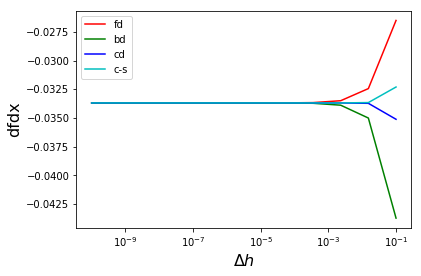

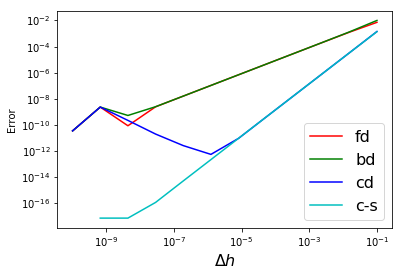

In [64]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#def f1d(x):
#    return x
#def f1dx(x):
#    return 1

#def f1d(x):
#    return x**2
#def f1dx(x):
#    return 2*x

def f1d(x):
   return np.exp(-5*x)
def f1dx(x):
   return -5*np.exp(-5*x)


x0 = 1
f0 = f1d(x0)
f0dx = f1dx(x0)

fdx = []
bdx = []
cdx = []
csdx = []

delta = np.logspace(-10,-1,12)
for d in delta:
    fdx.append((f1d(x0+d)-f0)/d) # Forward Difference
    bdx.append((f0-f1d(x0-d))/d) # Backward Difference
    cdx.append((f1d(x0+d)-f1d(x0-d))/(2*d)) # Central Difference
    csdx.append((f1d(np.complex(x0,d))/d).imag) # Complex-step
    
plt.figure(1)    
plt.semilogx(delta,fdx,'r-',label='fd')
plt.semilogx(delta,bdx,'g-',label='bd')
plt.semilogx(delta,cdx,'b-',label='cd')
plt.semilogx(delta,csdx,'c-',label='c-s')
plt.legend(loc='best')
plt.ylabel('dfdx',fontsize=16)
plt.xlabel('$\Delta h$',fontsize=16)
plt.show()

plt.figure(2)    
plt.loglog(delta,np.abs(np.array(fdx)-f0dx),'r-',label='fd')
plt.loglog(delta,np.abs(np.array(bdx)-f0dx),'g-',label='bd')
plt.loglog(delta,np.abs(np.array(cdx)-f0dx),'b-',label='cd')
plt.loglog(delta,np.abs(np.array(csdx)-f0dx),'c-',label='c-s')
plt.ylabel('Error')
plt.xlabel('$\Delta h$',fontsize=16)
plt.legend(loc='best',fontsize=16)
plt.show()

# Surrogate / response surfaces for objective and constraint functions
# Regression or interpolation surfaces (similar to line but in high dimensions)
# Problems that are computationally expensive 
# Problem dimensionality < 20
# Steps involved:
## 1. Sample points using design of experiments
## 2. Evaluate sample points (independent allows for parallization)
## 3. Construct response surface
## 4. Minimize response surface
# Example: Verification of quadratic response surface to approximate a quadratic function
## $$
f(\mathbf{x}) = x_1^2 + x_2^2 + 5x_1x_2
$$

In [65]:
%matplotlib notebook
import scipy.integrate as spint
from pyDOE import lhs
from  scipy.interpolate import Rbf
import numpy as np
import matplotlib.pylab as plt

# Step 1: DOE sampling
## DoE sampling points between 0 and 1 - scaling to actual domain
## $$x = LB + (UB - LB) DoEPoint,\;\;0\leq DoEPoint\leq 1$$
## Consider for example
## $$
-5 \leq x_1 \leq 5
$$
## and
## $$
-15 \leq x_2 \leq 10
$$

Note the range between 0 and 1 for the DOE values for x_1:
[ 0.53  0.91  0.93  0.15  0.35  0.57  0.25  0.27  0.55  0.71  0.99  0.65
  0.39  0.23  0.59  0.07  0.01  0.83  0.49  0.31  0.73  0.85  0.79  0.63
  0.87  0.89  0.67  0.95  0.41  0.77  0.51  0.03  0.69  0.43  0.29  0.61
  0.05  0.19  0.17  0.09  0.47  0.75  0.11  0.21  0.37  0.13  0.97  0.81
  0.33  0.45]
Note the range between actual bounds for x_1:
[ 0.3  4.1  4.3 -3.5 -1.5  0.7 -2.5 -2.3  0.5  2.1  4.9  1.5 -1.1 -2.7  0.9
 -4.3 -4.9  3.3 -0.1 -1.9  2.3  3.5  2.9  1.3  3.7  3.9  1.7  4.5 -0.9  2.7
  0.1 -4.7  1.9 -0.7 -2.1  1.1 -4.5 -3.1 -3.3 -4.1 -0.3  2.5 -3.9 -2.9 -1.3
 -3.7  4.7  3.1 -1.7 -0.5]


<IPython.core.display.Javascript object>


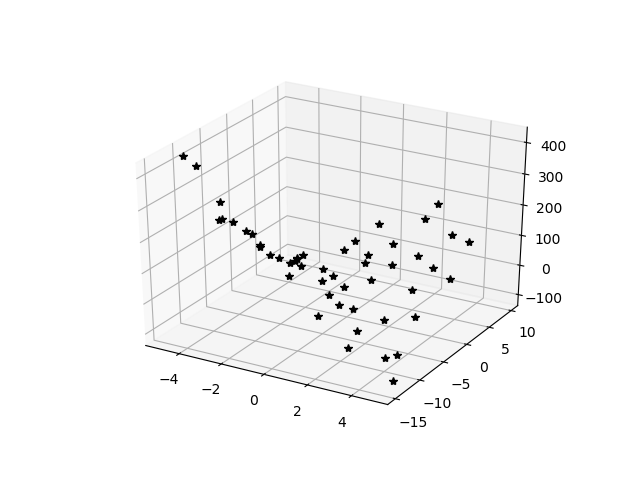

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pyDOE import lhs
DOElhs = lhs(2,samples=50,criterion='centermaximin')
UB = [5,10]
LB = [-5,-15]

X1 = (LB[0] + (UB[0]-LB[0])*DOElhs[:,0])
X2 = (LB[1] + (UB[1]-LB[1])*DOElhs[:,1])

print('Note the range between 0 and 1 for the DOE values for x_1:')
print(str(DOElhs[:,0]))
print('Note the range between actual bounds for x_1:')
print(X1)

# Plot DOE points on surface of evaluated function
DATA = (X1)**2 + (X2)**2 + 5*X1*X2
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X1,X2,DATA,'k*')

# Step 2: Evaluate sample points

# Step 3: Construct response surface
## Pure Quadratic Terms - you can add linear terms and constant$$
f(\mathbf{x}) = \alpha_1 x_1^2 + \alpha_2 x_2^2 + \alpha_3 x_1 x_2,\;\;\;\mathbf{x} \in R^2
$$$$
f(\mathbf{x}) = \alpha_1 x_1^2 + \alpha_2 x_2^2 + \alpha_3 x_3^2 + \alpha_4 x_1 x_2 + \alpha_5 x_2 x_3 + \alpha_6 x_1 x_3,\;\;\;\mathbf{x} \in R^3
$$$$
f(\mathbf{x}) = \alpha_1 x_1^2 + \alpha_2 x_2^2 + \alpha_3 x_3^2 + \alpha_4 x_3^2  + \alpha_5 x_1 x_2 +  \alpha_6 x_1 x_3 + \alpha_7 x_1 x_4 + \alpha_8 x_2 x_3 + \alpha_9 x_2 x_4 + \alpha_{10} x_3 x_4,\;\;\;\mathbf{x} \in R^4
$$
## What is this for five or six dimensions?
# Let the quadratic function $f(\mathbf{x})$ equal the actual function $\tilde{f}(\mathbf{x})$ at the $p$ DoE points $\mathbf{x}_1,\mathbf{x}_2, \dots, \mathbf{x}_p$,

## \begin{eqnarray}
f(\mathbf{x}_1) &=& \alpha_1 x_1(1)^2 + \alpha_2 x_1(2)^2 + \alpha_3 x_1(1)x_1(2) + \alpha_4 x_1(1) + \alpha_5 x_1(2) + \alpha_6 &=& \tilde{f}(\mathbf{x}_1)  \\
f(\mathbf{x}_2) &=& \alpha_1 x_2(1)^2 + \alpha_2 x_2(2)^2 + \alpha_3 x_2(1)x_1(2) + \alpha_4 x_2(1) + \alpha_5 x_2(2) + \alpha_6
&=& \tilde{f}(\mathbf{x}_2)  \\
\vdots&=&\vdots &=&\vdots \\
f(\mathbf{x}_p) &=& \alpha_1 x_p(1)^2 + \alpha_2 x_p(2)^2 + \alpha_3 x_p(1)x_1(2) + \alpha_4 x_p(1) + \alpha_5 x_p(2) + \alpha_6
&=& \tilde{f}(\mathbf{x}_p)  \\
\end{eqnarray}

## This can be rewritten into a matrix form:
## \begin{equation}
\left[
\begin{array}{llllll}
x_1(1)^2 & x_1(2)^2 & x_1(1)x_1(2) & x_1(1) & x_1(2) & 1\\
x_2(1)^2 & x_2(2)^2 & x_2(1)x_2(2)& x_2(1) & x_2(2) & 1\\
\vdots & \vdots & \vdots \\
x_p(1)^2 & x_p(2)^2 & x_p(1)x_p(2)& x_p(1) & x_p(2) & 1\\
\end{array}
\right]
\left[
\begin{array}{l}
\alpha_1\\
\alpha_2\\
\alpha_3\\
\alpha_4\\
\alpha_5\\
\alpha_6\\
\end{array}
\right]
=
\left[
\begin{array}{l}
\tilde{f}(\mathbf{x}_1)\\
\tilde{f}(\mathbf{x}_2)\\
\vdots\\
\tilde{f}(\mathbf{x}_p)\\
\end{array}
\right]
\end{equation}

## $$\mathbf{R}\mathbf{\alpha} = \mathbf{\tilde{f}}$$


## $p = 6$ - interpolation
## $$\mathbf{R}\mathbf{\alpha} = \mathbf{\tilde{f}}$$

## $p > 6$ - regression we need to solve a least squares problem 
## $$\mathbf{R}^\mathrm{T}\mathbf{R}\mathbf{\alpha} = \mathbf{R}^\mathrm{T}\mathbf{\tilde{f}}$$


In [7]:
import numpy as np

RT = np.array([X1**2,X2**2,X1*X2,X1,X2,np.ones(X1.shape)])
R = RT.transpose()

alpha = np.linalg.solve(R.transpose().dot(R),R.transpose().dot(DATA))
print(alpha)

[  1.00000000e+00   1.00000000e+00   5.00000000e+00   1.48215006e-15
   4.32288526e-15  -6.65110649e-14]


# Given our function is $$
f(\mathbf{x}) = x_1^2 + x_2^2 + 5x_1x_2
$$
# does the computed result make sense?

# Let's consider a slightly more complex surface to approximate
# $f(\mathbf{x}) = \mathbf{x_1}^2 + \mathbf{x}^2_2 + 100\sin(x_1)$

<IPython.core.display.Javascript object>


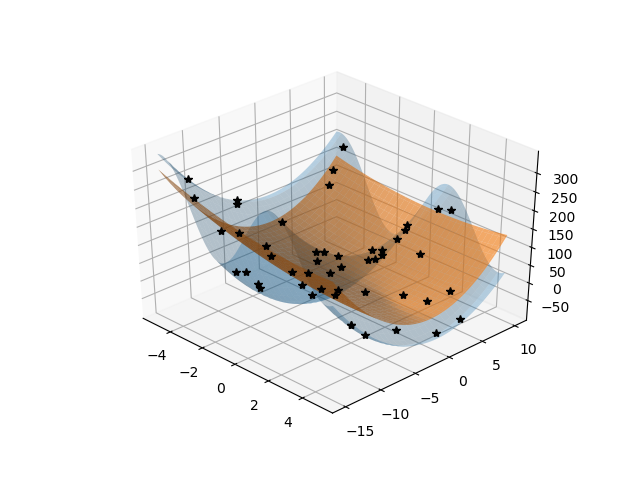

In [8]:
DATA = (X1)**2 + (X2)**2 + 100*np.sin(1*X1)
RT = np.array([X1**2,X2**2,X1*X2,X1,X2,np.ones(X1.shape)])
R = RT.transpose()
alpha = np.linalg.solve(R.transpose().dot(R),R.transpose().dot(DATA))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X1,X2,DATA,'k*')

[XX1,XX2] = np.meshgrid(np.linspace(LB[0],UB[0],101),np.linspace(LB[1],UB[1],101))
ACTUALSURF = (XX1)**2 + (XX2)**2 + 100*np.sin(1*XX1)
QUADSURF = alpha[0]*XX1**2 + alpha[1]*XX2**2 + alpha[2]*XX1*XX2 + alpha[3]*XX1 + alpha[4]*XX2 + alpha[5]

ax.plot_surface(XX1,XX2,ACTUALSURF,alpha=0.3)
ax.plot_surface(XX1,XX2,QUADSURF,alpha=0.6)

# Consider radial basis functions that are more flexible. See Chapter 7 of textbook that covers surrogate modeling.